Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Important /netflix.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.isna().sum().sum()/data.size*100

4.075356723818175

# **Preprocessing Of Data**

## Title-Cast DataFrame

In [ ]:
new=pd.DataFrame(data['title'])

In [ ]:
new['cast_']=data['cast'].str.split(',')

In [ ]:
new=new.explode('cast_',ignore_index=True)

In [ ]:
new

,title,cast_
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


## Title-Director DataFrame

In [ ]:
new1=pd.DataFrame(data['title'])

In [ ]:
new1['director']=data['director'].str.split(',')

In [ ]:
new1=new1.explode('director',ignore_index=True)

In [ ]:
new1

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,NaN
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


## Title-Genre Dataframe

In [ ]:
new2=pd.DataFrame(data['title'])

In [ ]:
new2['genre']=data['listed_in'].str.split(',')

In [ ]:
new2=new2.explode('genre',ignore_index=True)

In [ ]:
new2

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


##Title-Country DataFrame

In [ ]:
new3=pd.DataFrame(data[['title','country']])

## Merging all DataFrames

In [ ]:
a=pd.merge(new,new1,on='title')

In [ ]:
a

,title,cast_,director
0,Dick Johnson Is Dead,NaN,Kirsten Johnson
1,Blood & Water,Ama Qamata,NaN
2,Blood & Water,Khosi Ngema,NaN
3,Blood & Water,Gail Mabalane,NaN
4,Blood & Water,Thabang Molaba,NaN
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


In [ ]:
b=pd.merge(a,new2,on='title')

In [ ]:
b

,title,cast_,director,genre
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,NaN,International TV Shows
2,Blood & Water,Ama Qamata,NaN,TV Dramas
3,Blood & Water,Ama Qamata,NaN,TV Mysteries
4,Blood & Water,Khosi Ngema,NaN,International TV Shows
...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies


In [ ]:
c=pd.merge(b,new3,on='title')

In [ ]:
c

,title,cast_,director,genre,country
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa
...,...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [ ]:
data['director'].nunique()

4528

In [ ]:
data1=data.drop(columns=['director','cast','country','listed_in','description'])

In [ ]:
data1

,show_id,type,title,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min


## Now merging data1 and c dataframe to get finale table

In [ ]:
final_data=pd.merge(c,data1,on='title')

In [ ]:
final_data

,title,cast_,director,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


## Changing Date Format

In [ ]:
final_data['date_added']=pd.to_datetime(final_data['date_added'])

In [ ]:
final_data

,title,cast_,director,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min


In [ ]:
final_data[final_data['title']=='Baahubali: The Beginning (English Version)']

,title,cast_,director,genre,country,show_id,type,date_added,release_year,rating,duration
86664,Baahubali: The Beginning (English Version),Prabhas,S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86665,Baahubali: The Beginning (English Version),Prabhas,S.S. Rajamouli,Dramas,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86666,Baahubali: The Beginning (English Version),Prabhas,S.S. Rajamouli,International Movies,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86667,Baahubali: The Beginning (English Version),Rana Daggubati,S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86668,Baahubali: The Beginning (English Version),Rana Daggubati,S.S. Rajamouli,Dramas,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86669,Baahubali: The Beginning (English Version),Rana Daggubati,S.S. Rajamouli,International Movies,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86670,Baahubali: The Beginning (English Version),Anushka Shetty,S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86671,Baahubali: The Beginning (English Version),Anushka Shetty,S.S. Rajamouli,Dramas,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86672,Baahubali: The Beginning (English Version),Anushka Shetty,S.S. Rajamouli,International Movies,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min
86673,Baahubali: The Beginning (English Version),Tamannaah Bhatia,S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min


In [ ]:
final_data.isna().sum()

title               0
cast_            1733
director        44621
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [ ]:
final_data.isnull().sum().sum()/final_data.size*100

3.297608628965318

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Actor Director Pair

In [ ]:
m=final_data[['director','cast_']]

In [ ]:
m

,director,cast_
0,Kirsten Johnson,NaN
1,NaN,Ama Qamata
2,NaN,Ama Qamata
3,NaN,Ama Qamata
4,NaN,Khosi Ngema
...,...,...
161211,Mozez Singh,Anita Shabdish
161212,Mozez Singh,Anita Shabdish
161213,Mozez Singh,Chittaranjan Tripathy
161214,Mozez Singh,Chittaranjan Tripathy


In [ ]:
count_cast = m.groupby(["director", "cast_"]).size().reset_index(name="count")

In [ ]:
result_cast = count_cast.groupby(['director','count']).max()

In [ ]:
result_cast=result_cast.sort_values(['count'],ascending=False)

In [ ]:
result_cast=result_cast.reset_index()
result_cast.drop_duplicates(subset=['director'],keep='first',ignore_index=True)

,director,count,cast_
0,S.S. Rajamouli,21,Prabhas
1,Toshiya Shinohara,21,Kappei Yamaguchi
2,Rajiv Chilaka,20,Rajesh Kava
3,David Dhawan,18,Anupam Kher
4,Cathy Garcia-Molina,17,Joross Gamboa
...,...,...,...
4639,Clementine Malpas,1,Cate Blanchett
4640,Kader Aoun,1,Fary
4641,Vasanth Sai,1,Suriya
4642,Rodrigo Toro,1,Fabrizio Copano


In [ ]:
result_cast.drop('count',axis=1,inplace=True)

In [ ]:
result_cast

,director,cast_
0,S.S. Rajamouli,Prabhas
1,Toshiya Shinohara,Kappei Yamaguchi
2,Rajiv Chilaka,Rajesh Kava
3,Rajiv Chilaka,Rupa Bhimani
4,David Dhawan,Anupam Kher
...,...,...
5761,Rodrigo Toro,Fabrizio Copano
5762,Clark Johnson,Samuel L. Jackson
5763,Rod Blackhurst,Lucy Walters
5764,Karen J. Lloyd,Kelly Sheridan


In [ ]:
result_cast.isnull().sum()

director    0
cast_       0
dtype: int64

#Filling null values by using Actor-Director Pair

*   we are going to merge two dataframes so we can fill null values of cast columns.  



In [ ]:
merged_cast=pd.merge(final_data,result_cast,on='director',how='right')

In [ ]:
merged_cast.drop('cast__x',axis=1,inplace=True)

In [ ]:
merged_cast.rename(columns={'cast__y' : 'cast'},inplace=True)

In [ ]:
merged_cast

,title,director,genre,country,show_id,type,date_added,release_year,rating,duration,cast
0,Baahubali: The Beginning (English Version),S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min,Prabhas
1,Baahubali: The Beginning (English Version),S.S. Rajamouli,Dramas,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min,Prabhas
2,Baahubali: The Beginning (English Version),S.S. Rajamouli,International Movies,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min,Prabhas
3,Baahubali: The Beginning (English Version),S.S. Rajamouli,Action & Adventure,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min,Prabhas
4,Baahubali: The Beginning (English Version),S.S. Rajamouli,Dramas,NaN,s4482,Movie,2018-10-24,2015,TV-14,138 min,Prabhas
...,...,...,...,...,...,...,...,...,...,...,...
205482,The Endless,Aaron Moorhead,Sci-Fi & Fantasy,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
205483,The Endless,Aaron Moorhead,Thrillers,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
205484,The Endless,Aaron Moorhead,Independent Movies,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
205485,The Endless,Aaron Moorhead,Sci-Fi & Fantasy,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie


# Dealing with null entries in Country Column

* Instead of filling null values of Country
we are going to remove null entries
bez it is about 0.5% of overall data.  



In [ ]:
merged_cast.isna().sum().sum()/merged_cast.size * 100

0.5786696526256693

In [ ]:
df=merged_cast.dropna()

In [ ]:
df=df.reset_index()

# Final Data For Analysis

In [ ]:
df=df.drop('index',axis=1)

In [ ]:
df

,title,director,genre,country,show_id,type,date_added,release_year,rating,duration,cast
0,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Action & Adventure,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
1,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Dramas,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
2,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,International Movies,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
3,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Action & Adventure,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
4,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Dramas,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
...,...,...,...,...,...,...,...,...,...,...,...
192402,The Endless,Aaron Moorhead,Sci-Fi & Fantasy,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
192403,The Endless,Aaron Moorhead,Thrillers,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
192404,The Endless,Aaron Moorhead,Independent Movies,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie
192405,The Endless,Aaron Moorhead,Sci-Fi & Fantasy,United States,s8290,Movie,2018-09-19,2017,TV-MA,112 min,Anthony Mackie


In [ ]:
df.head()

,title,director,genre,country,show_id,type,date_added,release_year,rating,duration,cast
0,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Action & Adventure,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
1,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Dramas,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
2,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,International Movies,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
3,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Action & Adventure,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas
4,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,Dramas,India,s5335,Movie,2017-08-07,2017,TV-MA,165 min,Prabhas


# Q.1 Which type of shows to produce and how to grow the business.

In [ ]:
data['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

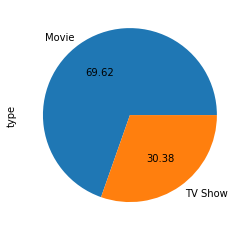

In [ ]:
data['type'].value_counts().plot(kind='pie',autopct="%.2f")

# What type of content is available in different countries?

In [ ]:
C=df[['type','country']]

In [ ]:
C=C.groupby(['type','country']).count()

In [ ]:
C                        # These are the countries having Movie and TV Shows widely used.

Empty DataFrame
Columns: []
Index: [(Movie, , France, Algeria), (Movie, Argentina), (Movie, Argentina, Brazil, France, Poland, Germany, Denmark), (Movie, Argentina, Chile), (Movie, Argentina, Chile, Peru), (Movie, Argentina, France), (Movie, Argentina, France, United States, Germany, Qatar), (Movie, Argentina, Spain), (Movie, Argentina, United States), (Movie, Argentina, Uruguay, Serbia), (Movie, Argentina, Uruguay, Spain, France), (Movie, Argentina, Venezuela), (Movie, Australia), (Movie, Australia, Canada), (Movie, Australia, France), (Movie, Australia, France, Ireland), (Movie, Australia, India), (Movie, Australia, Iraq), (Movie, Australia, United Arab Emirates), (Movie, Australia, United Kingdom), (Movie, Australia, United Kingdom, Canada), (Movie, Australia, United Kingdom, United Arab Emirates, Canada), (Movie, Australia, United States), (Movie, Austria), (Movie, Austria, Czech Republic), (Movie, Austria, United States), (Movie, Bangladesh), (Movie, Belgium, France), (Movie, Belgium, France, Netherlands), (Movie, Belgium, Ireland, Netherlands, Germany, Afghanistan), (Movie, Belgium, Netherlands), (Movie, Belgium, United Kingdom, United States), (Movie, Brazil), (Movie, Brazil, France), (Movie, Brazil, France, Germany), (Movie, Brazil, India, China, United States), (Movie, Brazil, Netherlands, United States, Colombia, Austria, Germany), (Movie, Brazil, United States), (Movie, Bulgaria), (Movie, Bulgaria, United States), (Movie, Bulgaria, United States, Spain, Canada), (Movie, Cambodia), (Movie, Cambodia, United States), (Movie, Cameroon), (Movie, Canada), (Movie, Canada, Belgium), (Movie, Canada, France, Italy, Morocco, United States), (Movie, Canada, France, United States), (Movie, Canada, Germany), (Movie, Canada, Germany, France, United States), (Movie, Canada, Hungary, United States), (Movie, Canada, India), (Movie, Canada, Ireland, United States), (Movie, Canada, Japan, United States), (Movie, Canada, Luxembourg), (Movie, Canada, Mexico, Germany, South Africa), (Movie, Canada, Nigeria), (Movie, Canada, Nigeria, United States), (Movie, Canada, Norway), (Movie, Canada, South Africa), (Movie, Canada, South Korea, United States), (Movie, Canada, Spain), (Movie, Canada, Spain, France), (Movie, Canada, United Kingdom), (Movie, Canada, United Kingdom, United States), (Movie, Canada, United States), (Movie, Canada, United States, Cayman Islands), (Movie, Canada, United States, Denmark), (Movie, Canada, United States, Germany), (Movie, Canada, United States, India, United Kingdom), (Movie, Canada, United States, Mexico), (Movie, Canada, United States, United Kingdom), (Movie, Chile), (Movie, Chile, Argentina), (Movie, Chile, Argentina, France, Spain, United States), (Movie, Chile, Brazil), (Movie, Chile, France), (Movie, Chile, Peru), (Movie, Chile, Spain, Argentina, Germany), (Movie, Chile, United States, France), (Movie, China), (Movie, China, Canada, United States), (Movie, China, Hong Kong), (Movie, China, Hong Kong, United States), (Movie, China, India, Nepal), (Movie, China, Japan), (Movie, China, Morocco, Hong Kong), (Movie, China, Spain, South Korea, United States), (Movie, China, Taiwan), (Movie, China, United Kingdom), (Movie, China, United States), (Movie, China, United States, Australia), (Movie, China, United States, Canada), (Movie, China, United States, United Kingdom), (Movie, Colombia), (Movie, Colombia, Mexico), (Movie, Colombia, Peru, United Kingdom), (Movie, Croatia, Slovenia, Serbia, Montenegro), (Movie, Czech Republic, Slovakia), (Movie, Czech Republic, United Kingdom, France), ...]

[640 rows x 0 columns]

# Q.1 How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
df['release_year'].unique()            ## We have data where Movie released between 1961 to 2017

array([2017, 2015, 2002, 2003, 2004, 2001, 2013, 2009, 2012, 2014, 2019,
       2000, 1999, 1997, 2005, 2010, 2018, 2008, 2016, 2006, 1994, 1989,
       2011, 1975, 1981, 1984, 1993, 2020, 1976, 1979, 1982, 1958, 1956,
       1963, 1954, 1970, 2007, 1974, 1990, 1973, 1980, 1967, 2021, 1972,
       1992, 1995, 1998, 1986, 1988, 1983, 1955, 1985, 1960, 1966, 1962,
       1969, 1996, 1987, 1991, 1978, 1977, 1968, 1971, 1965, 1964, 1944,
       1947, 1945, 1959, 1946, 1943, 1942, 1961])

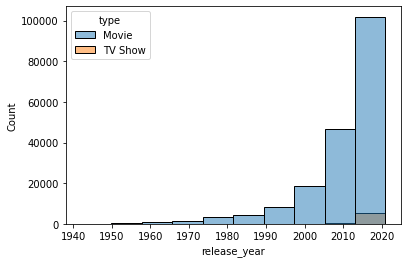

In [ ]:
sns.histplot(data=df,x='release_year',hue='type',bins=10)

# Q.2 Comparison of tv shows vs. movies.

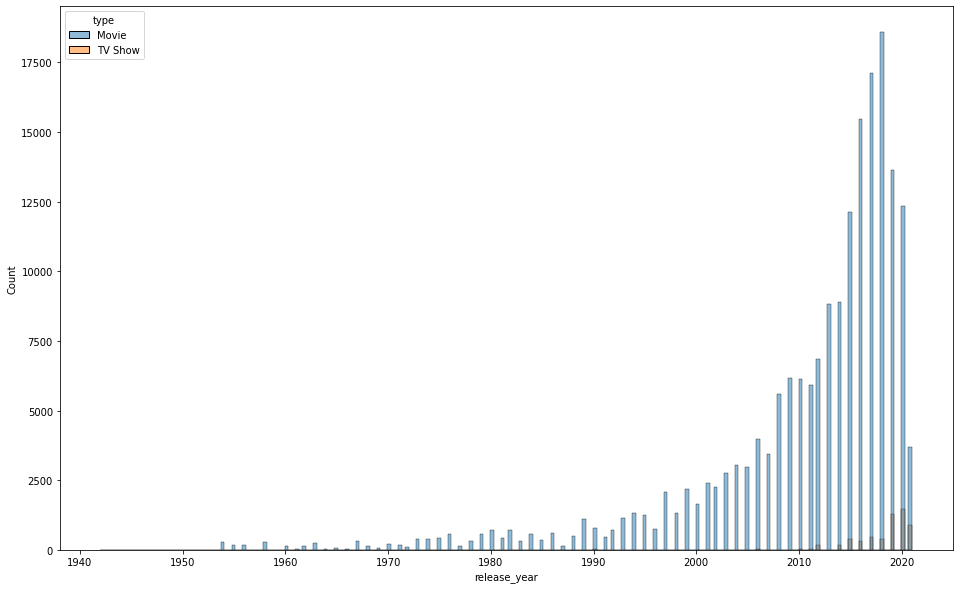

In [ ]:
plt.figure(figsize=(16,10))
sns.histplot(x='release_year',hue='type',data=df)


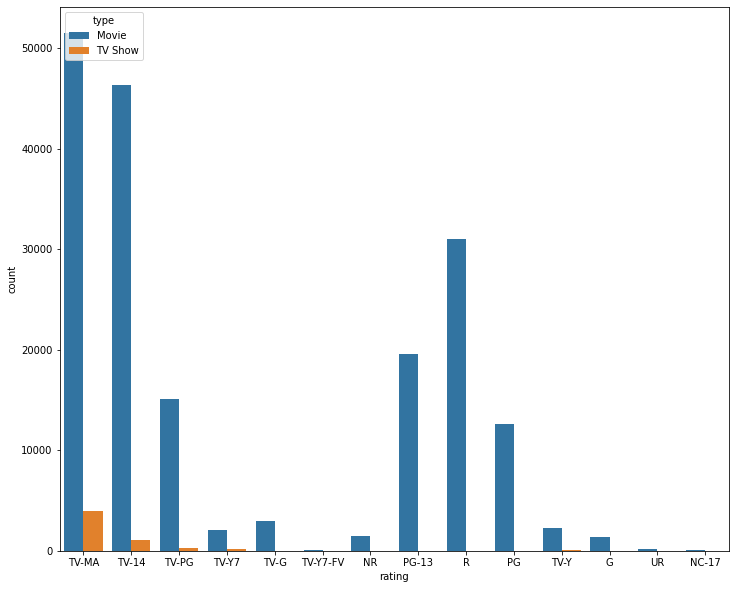

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.countplot(x='rating', hue='type', data=df)

# Q.3 What is the best time to launch a TV show

Here we need to use date_added column in consideratio.

We use given DataFrame as there is no need of processing of data for finding best time of launching TV Shows

In [ ]:
z=pd.DataFrame(data['type'])   ## Here we used old dataset ---> i.e. Given DataFrame

In [ ]:
data['date_added']=pd.to_datetime(data['date_added'])

In [ ]:
z['month']=data['date_added'].dt.month_name()

In [ ]:
z

,type,month
0,Movie,September
1,TV Show,September
2,TV Show,September
3,TV Show,September
4,TV Show,September
...,...,...
8802,Movie,November
8803,TV Show,July
8804,Movie,November
8805,Movie,January


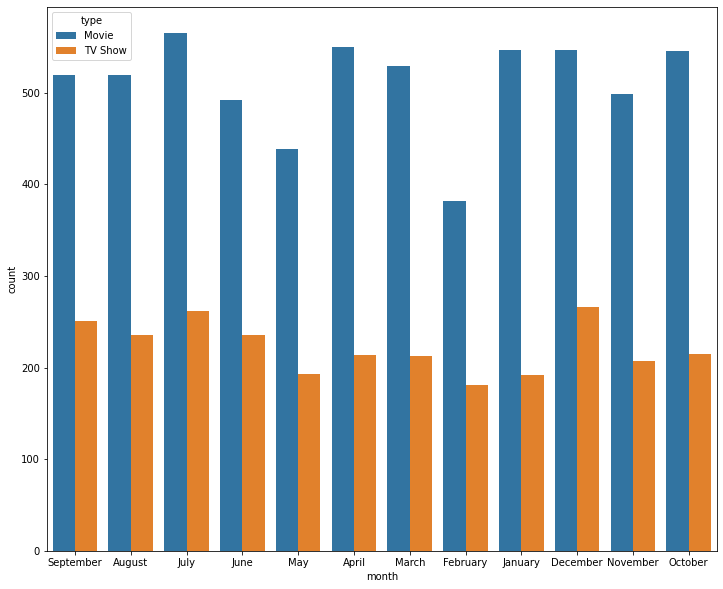

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x='month', hue='type', data=z)

# Q.4 Analysis of actors/directors of different types of shows/movies.

In [ ]:
from scipy import stats

In [ ]:
data_a=df[['type','director','cast']]

## Analysis of Actor-Director pair with Movies and TV shows

In [ ]:
data_a.groupby(['type','director','cast']).agg(lambda x: stats.mode(x['director'])[0])

type     director                   cast                 
Movie     Aaron Moorhead            Aaron Moorhead                     [ Aaron Moorhead]
                                    Anthony Mackie                     [ Aaron Moorhead]
          Abbas Alibhai Burmawalla  Saif Ali Khan            [ Abbas Alibhai Burmawalla]
          Abdullah Al Noor          Mostafizur Noor Imran            [ Abdullah Al Noor]
          Abhinav Shiv Tiwari       Anshuman Jha                  [ Abhinav Shiv Tiwari]
                                                                        ...             
TV Show  Vikramaditya Motwane       Saif Ali Khan                 [Vikramaditya Motwane]
         Wouter Bouvijn             Maaike Neuville                     [Wouter Bouvijn]
         Yasuhiro Irie              Romi Park                            [Yasuhiro Irie]
         Ziad Doueiri               Eric Cantona                          [Ziad Doueiri]
                                    Rami Doueiri    

In [ ]:
data_a.groupby(['type','director','cast']).max()

Empty DataFrame
Columns: []
Index: [(Movie,  Aaron Moorhead, Aaron Moorhead), (Movie,  Aaron Moorhead, Anthony Mackie), (Movie,  Abbas Alibhai Burmawalla, Saif Ali Khan), (Movie,  Abdullah Al Noor, Mostafizur Noor Imran), (Movie,  Abhinav Shiv Tiwari, Anshuman Jha), (Movie,  Adam Carolla, Willy T. Ribbs), (Movie,  Adam Darke, Justin Fashanu), (Movie,  Adam Egypt Mortimer, Madeleine Coghlan), (Movie,  Adam Larson Broder, Michael Bacall), (Movie,  Adam Nee, Kyle Gallner), (Movie,  Adam Schlesinger, Peter Martins), (Movie,  Adirek Wattaleela, Panisara Rikulsurakan), (Movie,  Ajay Bhuyan, Vir Das), (Movie,  Akihiko Yamashita, Fumino Kimura), (Movie,  Akiva Schaffer,  Maya Rudolph), (Movie,  Akiva Schaffer, Michael Bolton), (Movie,  Alain Gagnol, Marcus D'Angelo), (Movie,  Alan Hicks, Quincy Jones), (Movie,  Alan Mak, Jay Chou), (Movie,  Alana Waksman, Carmen Argenziano), (Movie,  Alban Teurlai, Rocco Siffredi), (Movie,  Alejandro Martinez-Beltran, Arcelia Ramírez), (Movie,  Alex Brewer, Nicolas Cage), (Movie,  Alex Woo,  Taron C. Hensley), (Movie,  Alex Woo, Alan C. Lim), (Movie,  Alexander Smith, Susanne Bartsch), (Movie,  Alexis Morante, Alejandro Sanz), (Movie,  Alfred Gimeno, Kate Higgins), (Movie,  Alice Mathias, Samuel L. Jackson), (Movie,  Alicky Sussman, Giles Yeo), (Movie,  Allan Jacobsen, Amber Frank), (Movie,  Allen Hughes, Denzel Washington), (Movie,  Amalie Næsby Fick, Paul Tylak), (Movie,  Amandha Wyanto, Christian Loho), (Movie,  Amir Galvan Cervera, Adrian Ladron), (Movie,  Anas Khan, Tovino Thomas), (Movie,  Andrew Duncan,  Erin Fitzgerald), (Movie,  Andrew Duncan, Laura Bailey), (Movie,  Andrew J. Smith, Matt Bomer), (Movie,  Andrew Loo, Ray Liotta), (Movie,  Andrew Meier, Tommaso Buscetta), (Movie,  Andrew Mogel, Jack Black), (Movie,  Andrew Sullivan, Maika Monroe), (Movie,  Anggy Umbara, Luna Maya), (Movie,  Anna Migotto, Helen Mirren), (Movie,  Anneliese Vandenberg, Kristin Davis), (Movie,  Annie Clark, Natalie Brown), (Movie,  Anthony Palmer, Charles Dance), (Movie,  Anthony Veiller, Burgess Meredith), (Movie,  Antonio Piazza, Julia Jedlikowska), (Movie,  Anu Menon, Anshuman Jha), (Movie,  Anurag Basu, Tusshar Kapoor), (Movie,  Anurag Kashyap,  Radhika Apte), (Movie,  Anurag Kashyap, Vicky Kaushal), (Movie,  Anél Stolp, Lika Berning), (Movie,  Apirak Samudkitpaisan, Panisara Rikulsurakan), (Movie,  Aram van de Rest, Yolanthe Cabau), (Movie,  Ariel Schulman, Jamie Foxx), (Movie,  Artemis Joukowsky, Tom Hanks), (Movie,  Ashley York, Tig Notaro), (Movie,  Atul Kale, Sudhir Joshi), (Movie,  Aubrey Powell, Russell Brand), (Movie,  Audu Paden, Laura Bailey), (Movie,  Augusto Matte, Belén Soto), (Movie,  Austin Kolodney, Carmen Argenziano), (Movie,  Bagus Bramanti, Bhisma Mulia), (Movie,  Bas van Teylingen, Dylan Haegens), (Movie,  Ben Foster, Andrew Wilson), (Movie,  Ben Pluimer, Roman Atwood), (Movie,  Ben Stassen, Jules Wojciechowski), (Movie,  Benny Safdie, Adam Sandler), (Movie,  Benoît Philippon, Joshua J. Ballard), (Movie,  Bill Plympton, Liam Neeson), (Movie,  Binayak Das, Sonal Kaushal), (Movie,  Birkan Pusa, Ahmet Kural), (Movie,  Björn Stein, Julianne Moore), (Movie,  Björn Stein, Kate Beckinsale), (Movie,  Bob Persichetti, Shameik Moore), (Movie,  Bobby Farrelly, Woody Harrelson), (Movie,  Brandon Jeffords, Lin-Manuel Miranda), (Movie,  Brandon Somerhalder, Carmen Argenziano), (Movie,  Brett Ratner, Greg Kinnear), (Movie,  Brian Niles, Grant Korgan), (Movie,  Briar Grace-Smith, Rachel House), (Movie,  Bruno Ascenzo, Gisela Ponce de León), (Movie,  Bruno Stagnaro, Héctor Anglada), (Movie,  Byron Howard, Kristen Bell), (Movie,  Carol Reed, Marlon Brando), (Movie,  Cem Yılmaz, Cem Yılmaz), (Movie,  Charles Walters, Leslie Caron), (Movie,  Chike, Stephon Marbury), (Movie,  Chow Kwun-wai, Wong Jing), (Movie,  Chris Bouchard, William Moseley), (Movie,  Chris Buck, Shia LaBeouf), (Movie,  Chris Butler, Kodi Smit-McPhee), (Movie,  Chris Sanders, Nicolas Cage), (Movie,  Chris Williams, John Travolta), (Movie,  Ch

## Q.5 Does Netflix has more focus on TV Shows than movies in recent years

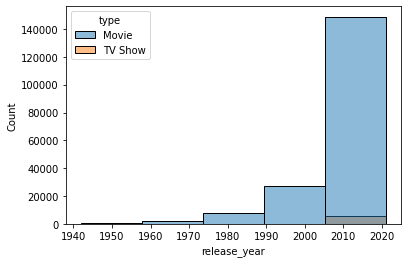

In [ ]:
sns.histplot(data=df,x='release_year',hue='type',bins=5)

# Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

2)Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point, hence recommended.

4)For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5)The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .

6)Add movies for Indian Audience, it has been declining since 2018.

7)Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.

8) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.

********************************************************************************